In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import silhouette_samples, silhouette_score
import gzip
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setup the columns and open the file - Rolf Code
columns = [
    'karl_id', 'host_name', 'model_name', 'hardware_make', 'karl_last_seen',
    'auth_username', 'serial_number', 'group_id', 'tenant_id', 'platform',
    'metric_category', 'measure_name', 'time', 'p90_processor_time',
    'avg_processor_time', 'max_cpu_usage', 'p90_memory_utilization',
    'avg_memory_utilization', 'max_memory_usage', 'p10_battery_health',
    'avg_battery_health', 'cpu_count', 'memory_count', 'memory_size_gb',
    'driver_vendor', 'os', 'wifi_mac_add', 'driver_version', 'driver_date',
    'os_version', 'driver', 'agent_id', 'performance_status', 'device_status',
    'max_battery_temperature', 'avg_battery_temperature', 'p90_battery_temperature',
    'avg_cpu_temp', 'p90_cpu_temp', 'avg_battery_discharge', 'p90_battery_discharge',
    'avg_boot_time', 'p90_boot_time', 'uptime_days', 'total_app_crash'
]

chunk_size = 100000
sample_data = []
with gzip.open('000.gz', 'rt') as f:
    for i, chunk in enumerate(pd.read_csv(f, sep='|', names=columns, chunksize=chunk_size)):
        sample_data.append(chunk)
        if i >= 4:
            break

df = pd.concat(sample_data, ignore_index=True)

numeric_cols = ['avg_processor_time', 'max_cpu_usage', 'avg_memory_utilization',
                'max_memory_usage', 'avg_battery_health', 'cpu_count', 'memory_size_gb',
                'avg_cpu_temp', 'avg_boot_time', 'p90_boot_time', 'uptime_days', 'total_app_crash']

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

host_stats = df.groupby('host_name').agg({
    'total_app_crash': 'mean',
    'avg_processor_time': 'mean',
    'avg_memory_utilization': 'mean',
    'avg_cpu_temp': 'mean',
    'avg_boot_time': 'mean',
    'uptime_days': 'mean',
    'max_cpu_usage': 'mean',
    'max_memory_usage': 'mean'
}).dropna()

Loading data for predictive modeling...
Loaded 500000 records
High Risk Threshold: 4 crashes
High Risk Hosts: 1946 (13.6%)

Training Random Forest Classifier...

Random Forest Performance:
Accuracy: 0.833
ROC-AUC: 0.661
              precision    recall  f1-score   support

           0      0.887     0.925     0.906      2468
           1      0.347     0.254     0.294       389

    accuracy                          0.833      2857
   macro avg      0.617     0.590     0.600      2857
weighted avg      0.814     0.833     0.822      2857


Training Gradient Boosting Classifier...

Gradient Boosting Performance:
Accuracy: 0.866
ROC-AUC: 0.631
              precision    recall  f1-score   support

           0      0.871     0.991     0.927      2468
           1      0.560     0.072     0.128       389

    accuracy                          0.866      2857
   macro avg      0.716     0.532     0.527      2857
weighted avg      0.829     0.866     0.818      2857



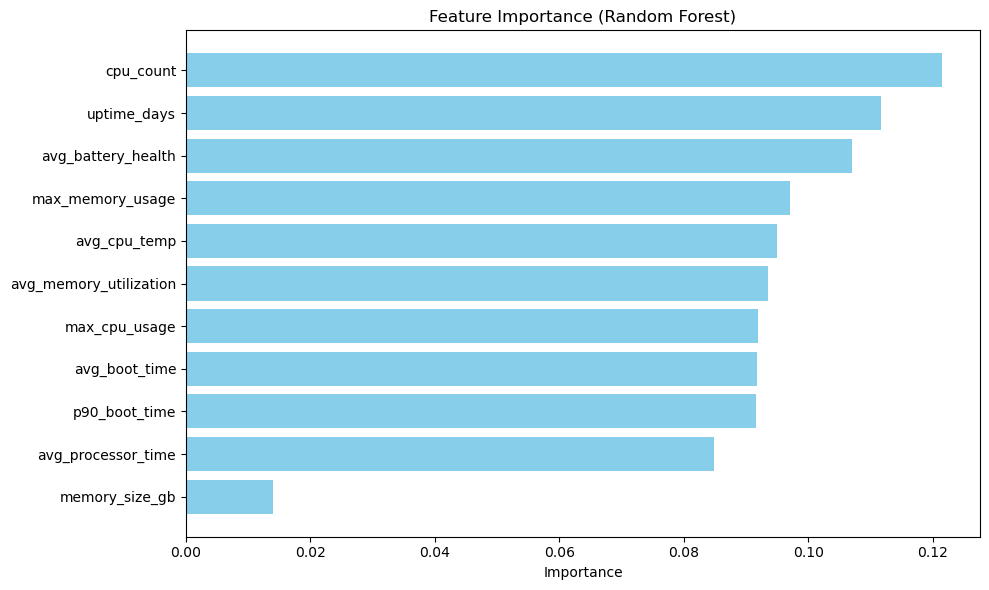


High Risk Profile vs Low Risk Profile:
  avg_processor_time: 18.51 (vs 18.43, +0.4%)
  max_cpu_usage: 30.59 (vs 30.27, +1.1%)
  avg_memory_utilization: 73.56 (vs 72.27, +1.8%)
  max_memory_usage: 84.70 (vs 83.67, +1.2%)
  avg_battery_health: 80.47 (vs 78.55, +2.4%)
  cpu_count: 3706.38 (vs 3350.85, +10.6%)
  memory_size_gb: 16.23 (vs 16.38, -0.9%)
  avg_cpu_temp: 63.66 (vs 63.01, +1.0%)
  avg_boot_time: 16.78 (vs 17.51, -4.2%)
  p90_boot_time: 20.94 (vs 26.17, -20.0%)
  uptime_days: 6.48 (vs 7.22, -10.2%)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import gzip
import warnings
warnings.filterwarnings('ignore')

print("Loading data for predictive modeling...")
columns = [
    'karl_id', 'host_name', 'model_name', 'hardware_make', 'karl_last_seen',
    'auth_username', 'serial_number', 'group_id', 'tenant_id', 'platform',
    'metric_category', 'measure_name', 'time', 'p90_processor_time',
    'avg_processor_time', 'max_cpu_usage', 'p90_memory_utilization',
    'avg_memory_utilization', 'max_memory_usage', 'p10_battery_health',
    'avg_battery_health', 'cpu_count', 'memory_count', 'memory_size_gb',
    'driver_vendor', 'os', 'wifi_mac_add', 'driver_version', 'driver_date',
    'os_version', 'driver', 'agent_id', 'performance_status', 'device_status',
    'max_battery_temperature', 'avg_battery_temperature', 'p90_battery_temperature',
    'avg_cpu_temp', 'p90_cpu_temp', 'avg_battery_discharge', 'p90_battery_discharge',
    'avg_boot_time', 'p90_boot_time', 'uptime_days', 'total_app_crash'
]

chunk_size = 100000
sample_data = []
with gzip.open('000.gz', 'rt') as f:
    for i, chunk in enumerate(pd.read_csv(f, sep='|', names=columns, chunksize=chunk_size)):
        sample_data.append(chunk)
        if i >= 4:
            break

df = pd.concat(sample_data, ignore_index=True)

numeric_cols = [
    'p90_processor_time', 'avg_processor_time', 'max_cpu_usage',
    'p90_memory_utilization', 'avg_memory_utilization', 'max_memory_usage',
    'p10_battery_health', 'avg_battery_health', 'cpu_count', 'memory_count',
    'memory_size_gb', 'max_battery_temperature', 'avg_battery_temperature',
    'p90_battery_temperature', 'avg_cpu_temp', 'p90_cpu_temp',
    'avg_battery_discharge', 'p90_battery_discharge', 'avg_boot_time',
    'p90_boot_time', 'uptime_days', 'total_app_crash'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['time'] = pd.to_datetime(df['time'], errors='coerce')

print(f"Loaded {len(df)} records")

# --- FEATURE PREPARATION ---
feature_cols = [
    'avg_processor_time', 'max_cpu_usage', 'avg_memory_utilization',
    'max_memory_usage', 'avg_battery_health', 'cpu_count', 'memory_size_gb',
    'avg_cpu_temp', 'avg_boot_time', 'p90_boot_time', 'uptime_days'
]

model_df = df[feature_cols + ['total_app_crash', 'host_name']].dropna()

# --- CREATE HIGH-RISK LABEL ---
high_risk_threshold = model_df['total_app_crash'].quantile(0.9)
model_df['high_risk'] = (model_df['total_app_crash'] >= high_risk_threshold).astype(int)

print(f"High Risk Threshold: {high_risk_threshold:.0f} crashes")
print(f"High Risk Hosts: {model_df['high_risk'].sum()} ({model_df['high_risk'].mean() * 100:.1f}%)")

# --- SPLIT DATA ---
X = model_df[feature_cols]
y = model_df['high_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- TRAIN RANDOM FOREST CLASSIFIER ---
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.3f}")
print(classification_report(y_test, y_pred_rf, digits=3))

# --- TRAIN GRADIENT BOOSTING CLASSIFIER ---
print("\nTraining Gradient Boosting Classifier...")
gb_model = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
y_prob_gb = gb_model.predict_proba(X_test)[:, 1]

print("\nGradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_gb):.3f}")
print(classification_report(y_test, y_pred_gb, digits=3))

# --- FEATURE IMPORTANCE (RF) ---
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(range(len(feature_importance)), feature_importance['importance'], color='skyblue')
plt.yticks(range(len(feature_importance)), feature_importance['feature'])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- INSIGHTS ---
high_risk_profile = model_df[model_df['high_risk'] == 1][feature_cols].mean()
low_risk_profile = model_df[model_df['high_risk'] == 0][feature_cols].mean()

print("\nHigh Risk Profile vs Low Risk Profile:")
for col in feature_cols:
    diff = ((high_risk_profile[col] - low_risk_profile[col]) / low_risk_profile[col] * 100)
    print(f"  {col}: {high_risk_profile[col]:.2f} (vs {low_risk_profile[col]:.2f}, {diff:+.1f}%)")

Accuracy: 0.8820441022051102
ROC-AUC: 0.7070106619224792
              precision    recall  f1-score   support

           0      0.881     0.998     0.936      2468
           1      0.919     0.147     0.253       389

    accuracy                          0.882      2857
   macro avg      0.900     0.572     0.594      2857
weighted avg      0.886     0.882     0.843      2857


Top Features Contributing to High-Risk Hosts:
                   feature  importance
5                cpu_count    0.108875
10             uptime_days    0.108064
4       avg_battery_health    0.101210
7             avg_cpu_temp    0.099869
2   avg_memory_utilization    0.097127
8            avg_boot_time    0.096197
3         max_memory_usage    0.095846
9            p90_boot_time    0.095660
1            max_cpu_usage    0.094145
0       avg_processor_time    0.090340
6           memory_size_gb    0.012666

Average Values of Top Features (High vs Low Risk):
cpu_count: 3706.38 (vs 3350.85, +10.6%)
uptime_da

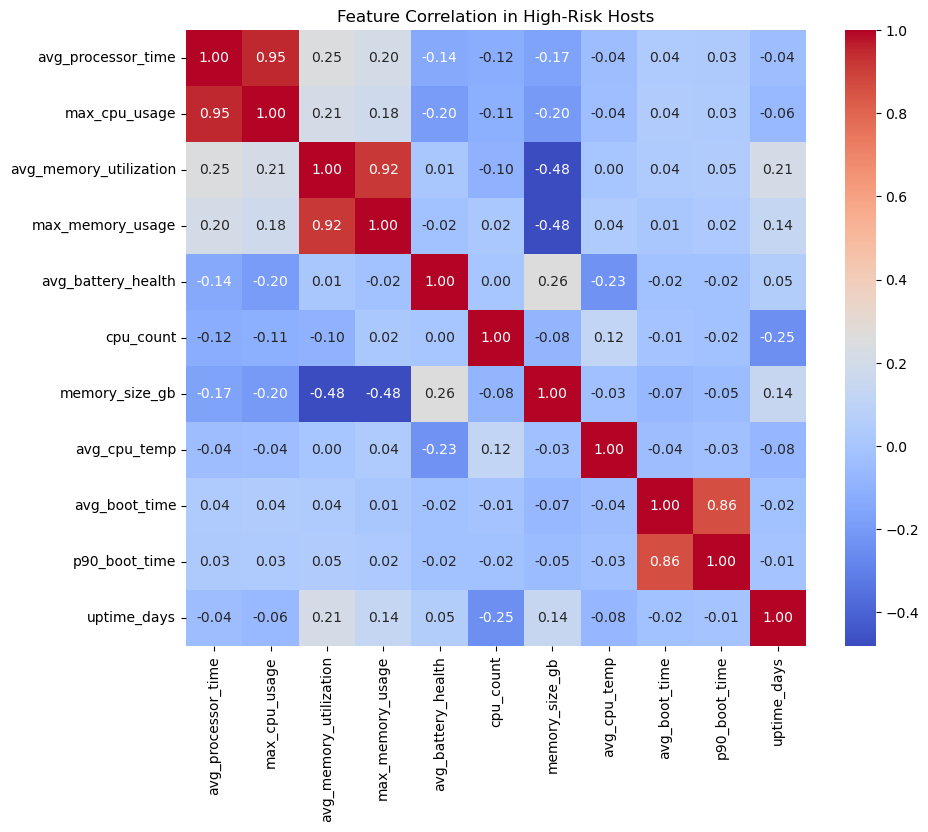

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import gzip
import warnings
warnings.filterwarnings('ignore')

# --- Load data ---
columns = [
    'karl_id','host_name','model_name','hardware_make','karl_last_seen','auth_username','serial_number',
    'group_id','tenant_id','platform','metric_category','measure_name','time','p90_processor_time',
    'avg_processor_time','max_cpu_usage','p90_memory_utilization','avg_memory_utilization','max_memory_usage',
    'p10_battery_health','avg_battery_health','cpu_count','memory_count','memory_size_gb','driver_vendor',
    'os','wifi_mac_add','driver_version','driver_date','os_version','driver','agent_id','performance_status',
    'device_status','max_battery_temperature','avg_battery_temperature','p90_battery_temperature','avg_cpu_temp',
    'p90_cpu_temp','avg_battery_discharge','p90_battery_discharge','avg_boot_time','p90_boot_time','uptime_days',
    'total_app_crash'
]

sample_data = []
with gzip.open('000.gz', 'rt') as f:
    for i, chunk in enumerate(pd.read_csv(f, sep='|', names=columns, chunksize=100000)):
        sample_data.append(chunk)
        if i >= 4:
            break

df = pd.concat(sample_data, ignore_index=True)

# --- Numeric conversion ---
numeric_cols = [
    'p90_processor_time','avg_processor_time','max_cpu_usage','p90_memory_utilization','avg_memory_utilization',
    'max_memory_usage','p10_battery_health','avg_battery_health','cpu_count','memory_count','memory_size_gb',
    'max_battery_temperature','avg_battery_temperature','p90_battery_temperature','avg_cpu_temp','p90_cpu_temp',
    'avg_battery_discharge','p90_battery_discharge','avg_boot_time','p90_boot_time','uptime_days','total_app_crash'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df['time'] = pd.to_datetime(df['time'], errors='coerce')

# --- Feature selection ---
feature_cols = [
    'avg_processor_time','max_cpu_usage','avg_memory_utilization','max_memory_usage','avg_battery_health',
    'cpu_count','memory_size_gb','avg_cpu_temp','avg_boot_time','p90_boot_time','uptime_days'
]

model_df = df[feature_cols + ['total_app_crash', 'host_name']].dropna()

# --- High-risk label ---
high_risk_threshold = model_df['total_app_crash'].quantile(0.9)
model_df['high_risk'] = (model_df['total_app_crash'] >= high_risk_threshold).astype(int)

# --- Train/test split ---
X = model_df[feature_cols]
y = model_df['high_risk']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Random Forest Classifier ---
rf_model = RandomForestClassifier(n_estimators=300, max_depth=None, random_state=42, n_jobs=-1, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred, digits=3))

# --- Feature Importance (root cause) ---
importance_df = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop Features Contributing to High-Risk Hosts:")
print(importance_df)

# --- Compare High-Risk vs Low-Risk Profiles ---
high_risk = model_df[model_df['high_risk'] == 1]
low_risk = model_df[model_df['high_risk'] == 0]

print("\nAverage Values of Top Features (High vs Low Risk):")
for f in importance_df['feature']:
    hr_mean = high_risk[f].mean()
    lr_mean = low_risk[f].mean()
    diff_pct = (hr_mean - lr_mean)/lr_mean * 100
    print(f"{f}: {hr_mean:.2f} (vs {lr_mean:.2f}, {diff_pct:+.1f}%)")

# --- Correlation heatmap for multivariate patterns ---
plt.figure(figsize=(10,8))
sns.heatmap(high_risk[feature_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation in High-Risk Hosts")
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import gzip
import warnings
warnings.filterwarnings('ignore')

# --- Load sample data ---
columns = [
    'karl_id','host_name','model_name','hardware_make','karl_last_seen','auth_username','serial_number',
    'group_id','tenant_id','platform','metric_category','measure_name','time','p90_processor_time',
    'avg_processor_time','max_cpu_usage','p90_memory_utilization','avg_memory_utilization','max_memory_usage',
    'p10_battery_health','avg_battery_health','cpu_count','memory_count','memory_size_gb','driver_vendor',
    'os','wifi_mac_add','driver_version','driver_date','os_version','driver','agent_id','performance_status',
    'device_status','max_battery_temperature','avg_battery_temperature','p90_battery_temperature','avg_cpu_temp',
    'p90_cpu_temp','avg_battery_discharge','p90_battery_discharge','avg_boot_time','p90_boot_time','uptime_days',
    'total_app_crash'
]

sample_data = []
with gzip.open('000.gz', 'rt') as f:
    for i, chunk in enumerate(pd.read_csv(f, sep='|', names=columns, chunksize=100000)):
        sample_data.append(chunk)
        if i >= 4:  # limit to first few chunks
            break
df = pd.concat(sample_data, ignore_index=True)

# --- Numeric conversion ---
numeric_cols = [
    'p90_processor_time','avg_processor_time','max_cpu_usage','p90_memory_utilization','avg_memory_utilization',
    'max_memory_usage','p10_battery_health','avg_battery_health','cpu_count','memory_count','memory_size_gb',
    'max_battery_temperature','avg_battery_temperature','p90_battery_temperature','avg_cpu_temp','p90_cpu_temp',
    'avg_battery_discharge','p90_battery_discharge','avg_boot_time','p90_boot_time','uptime_days','total_app_crash'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# --- Features & high-risk label ---
feature_cols = [
    'avg_processor_time','max_cpu_usage','avg_memory_utilization','max_memory_usage','avg_battery_health',
    'cpu_count','memory_size_gb','avg_cpu_temp','avg_boot_time','p90_boot_time','uptime_days'
]

model_df = df[feature_cols + ['total_app_crash']].dropna()
high_risk_threshold = model_df['total_app_crash'].quantile(0.9)
model_df['high_risk'] = (model_df['total_app_crash'] >= high_risk_threshold).astype(int)

# --- Train Random Forest Classifier ---
X = model_df[feature_cols]
y = model_df['high_risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf_model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train, y_train)

# --- Calculate feature stats on normal hosts for diagnostics ---
normal_stats = model_df[model_df['high_risk']==0][feature_cols].agg(['mean','std'])

# --- Function to diagnose a new host ---
def diagnose_host(host_telemetry):
    """
    host_telemetry: dict with same keys as feature_cols
    """
    host_df = pd.DataFrame([host_telemetry])
    diagnosis = {}
    
    for f in feature_cols:
        val = host_telemetry[f]
        mean = normal_stats.loc['mean', f]
        std = normal_stats.loc['std', f]
        if std == 0: std = 1e-6  # avoid division by zero
        
        z = (val - mean) / std
        diagnosis[f] = {
            'value': val,
            'mean': mean,
            'std': std,
            'z_score': z,
            'out_of_range': abs(z) > 2  # flag if >2 std devs from normal
        }
    
    # Optional: predict high-risk probability
    prob = rf_model.predict_proba(host_df[feature_cols])[:,1][0]
    
    return diagnosis, prob

# --- Example usage ---
new_host = {
    'avg_processor_time': 45,
    'max_cpu_usage': 90,
    'avg_memory_utilization': 80,
    'max_memory_usage': 95,
    'avg_battery_health': 60,
    'cpu_count': 8,
    'memory_size_gb': 16,
    'avg_cpu_temp': 75,
    'avg_boot_time': 25,
    'p90_boot_time': 30,
    'uptime_days': 5
}

diagnosis, risk_prob = diagnose_host(new_host)

print(f"Predicted high-risk probability: {risk_prob:.2f}\n")
print("Feature deviations from normal:")
for f, info in diagnosis.items():
    if info['out_of_range']:
        print(f"- {f}: {info['value']} (mean={info['mean']:.1f}, z={info['z_score']:.1f})")

Predicted high-risk probability: 0.16

Feature deviations from normal:
- avg_processor_time: 45 (mean=18.4, z=2.8)
- max_cpu_usage: 90 (mean=30.3, z=3.6)
